In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

from typing import Tuple

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Logistic Regression

In [187]:
# 数据加载
data = pd.read_csv('ex2data1.txt', header=None)

X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

(m, n) = X.shape

X = np.c_[np.ones((m, 1)), X]

initial_theta = np.zeros(n + 1)
# 查看数据
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualizing the data

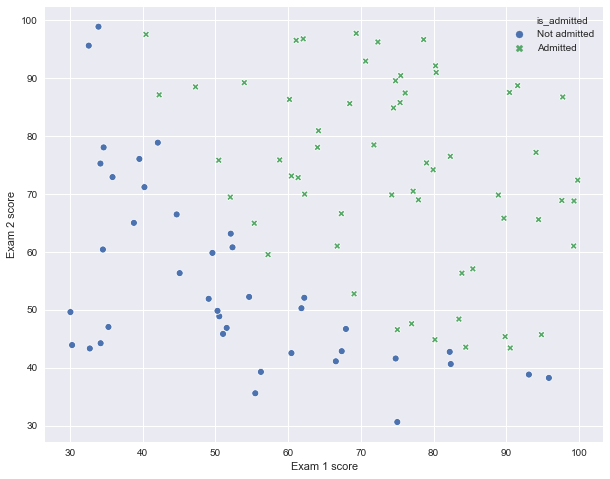

In [188]:
data['is_admitted'] = data[2].map({1: 'Admitted', 0: 'Not admitted'})

plt.figure(figsize=(10, 8))
markers = {'Admitted': 'X', 'Not admitted': 'o'}
sns.scatterplot(x=0, y=1, hue='is_admitted', style='is_admitted',
                markers=markers, data=data)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

## Implementation

### sigmoid function

regresion hypothesis is defined as:

$h_\theta(x)=g(\theta^Tx) \tag{1}$

where function $g$ is the sigmoid function.The sigmoid function is defined as:

$g(z)=\frac{1}{1+e^{-z}} \tag{2}$

where $z$ is $\theta^Tx$

In [64]:
# For a matrix, your function should perform the sigmoid
# function on every element.


def sigmoid(z: np.array) -> np.array:

    return 1 / (1 + np.exp(- z))

### Cost function and gradient

logistic regression is

$$J(\theta) = \frac{1}{m}\sum^m_{i=1}[-y^{i}log(h_theta(x^{(i)}))-(1-y^{(i)}log(1-h_theta(x^{(i)}))] \tag{3}$$

tand the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element(for j=0,1,2,3...,n) is defined as follows:

$$\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum^m_{i=1}(h_{\theta}(x^{(i)}-y^{(i)})x^{(i)}_j$$

In [128]:
def costFunction(theta: np.array, X: np.array, y: np.array) -> float:

    m = len(y)

    h = sigmoid(X @ theta)

    J = 1 / m * (-y @ np.log(h) - (1-y) @ np.log(1-h))

    return J


def gradientFunction(theta: np.array, X: np.array, y: np.array) -> np.array:

    h = sigmoid(X @ theta)

    return 1 / m * (X.T @ (h - y))

In [131]:
# Compute and display initial cost and gradient
# Expected cost (approx): 0.693
cost = costFunction(initial_theta, X, y)
grad = gradientFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): %f\n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print('%s \n' % grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221] 

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



### Learning parameters using scipy.optimize.minimize

使用[scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)拟合参数,`method参数设置为Newton-CG`

In [137]:
test_theta = np.array([-24, 0.2, 0.2])
res = minimize(fun=costFunction, x0=test_theta, args=(
    X, y), method='Newton-CG', jac=gradientFunction)

cost = res['fun']
theta = res['x']

print('Cost at theta found by fminunc: %f\n'% cost);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print('%s \n'%theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.203498

Expected cost (approx): 0.203

theta: 

[-25.16271863   0.20624279   0.20148281] 

Expected theta (approx):

 -25.161
 0.206
 0.201



### Evaluating logistic regression

In [136]:
def predict(theta:np.array,X:np.array)->np.array:
    
    return (sigmoid(X.T @ theta) >= 0.5) * 1

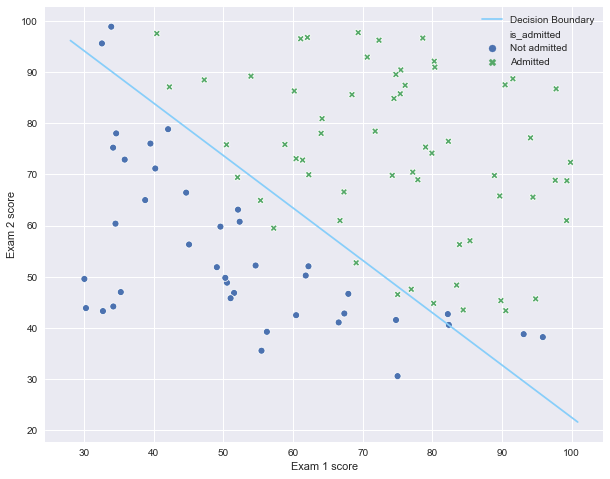

In [205]:
# 计算边界
plot_x = np.array([min(X[:,1])-2,max(X[:,2])+2])
plot_y = (-1./theta[2]) * (theta[1] * plot_x + theta[0])

plt.figure(figsize=(10, 8))
markers = {'Admitted': 'X', 'Not admitted': 'o'}

sns.scatterplot(x=0, y=1, hue='is_admitted', style='is_admitted',
                markers=markers, data=data)

plt.plot(plot_x,plot_y,color='Crimson',label='Decision Boundary')
plt.legend()
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

# Regularized logistic regression

In [105]:
# 数据加载
data1 = pd.read_csv('ex2data2.txt', header=None)

X = data1.iloc[:, :2].values
y = data1.iloc[:, 2].values

# 查看数据
data1.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## Visualizing the data

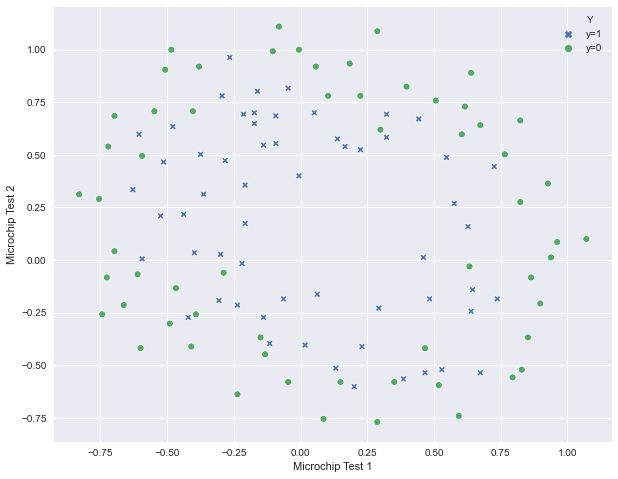

In [53]:
data1['Y'] = data1[2].map({1: 'y=1', 0: 'y=0'})
plt.figure(figsize=(10, 8))
markers = {'y=1': 'X', 'y=0': 'o'}

sns.scatterplot(x=0, y=1, hue='Y', style='Y',
                markers=markers, data=data1)

plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.show()

## Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function mapFeature.m, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

$$mapFeature(x)=\left[\begin{matrix}1\\
x_1\\
x_2\\
x^2_1\\
x_1x_2\\
x^2_2\\
x^3_1\\
\vdots\\
x_1x^5_2\\
x^6_2\end{matrix}\right]$$

In [162]:
def mapFeature(X1: np.array, X2: np.array, degree: int) -> np.array:
    
   
    if type(X1) != np.ndarray:
        m = 1
    else:
        m = len(X1)

    n = int((degree + 2) * (degree + 1) / 2)

    out = np.zeros((m, n))
    
    count = 0

    for i in range(degree+1):

        for j in range(i+1):

            out[:, count] = np.power(X1, i-j) * np.power(X2, j)
          
            count += 1

    return out

In [107]:
X = mapFeature(X[:,0], X[:,1],6)

initial_theta = np.zeros(X.shape[1])

lambda_ = 1

## Cost function and gradient

$$J(\theta)=\frac{1}{m}\sum^{m}_{i=1}[-y^{(i)}log(h_\theta(x^{(i)})-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]+\frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j$$

**Gradient Descent**

$$\frac{\partial J(\theta)}{\partial\theta_0}=\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_0$$

$$\frac{\partial J(\theta)}{\partial\theta_j}=\left(\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j\right)+\frac{\lambda}{m}\theta_j$$

In [89]:
def costFunctionReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> float:

    m = len(y)

    h = sigmoid(X @ theta)

    return (1 / m) * (- y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + \
        lambda_ / (2 * m) * (theta.T @ theta)


def gradientFunctionReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> np.array:
    
    m = len(y)
    
    h = sigmoid(X @ theta)
    
    lambda_theta = (lambda_ / m) * theta[1:]
    lambda_theta = np.insert(lambda_theta,0,0)
    
    return (1 / m) * (h - y).T @ X + lambda_theta

In [114]:
cost = costFunctionReg(initial_theta,X,y,lambda_)
grad = gradientFunctionReg(initial_theta,X,y,lambda_)

print('Cost at initial theta (zeros): %s\n'%cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print(' %s \n'%np.round(grad,4)[:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.6931471805599453

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

 [0.0085 0.0188 0.0001 0.0503 0.0115] 

Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



## Learning parameter using scipy.optimize.minimize

In [119]:
initial_theta = np.zeros(X.shape[1])

res = minimize(fun=costFunctionReg, x0=initial_theta, args=(
    X, y,lambda_), method='Newton-CG', jac=gradientFunctionReg)

cost = res['fun']
theta = res['x']

print('Cost is %s\n'%cost)
print('theta is %s'%theta)

Cost is 0.53586652521783

theta is [ 1.27273553  0.62524097  1.1810531  -2.01993151 -0.91742171 -1.43167164
  0.12401925 -0.3655029  -0.35722427 -0.17512533 -1.45815585 -0.05098166
 -0.61557522 -0.27470553 -1.19280906 -0.24217867 -0.2059794  -0.04473734
 -0.27778517 -0.29536614 -0.45633599 -1.0432025   0.02778164 -0.29244154
  0.01556342 -0.32738606 -0.14389155 -0.92461636]


## Plotting the decision boundary

In [154]:
def PlotLogisticDecisionBoundary(data: pd.DataFrame,lambda_:float):

    data = data.copy()

    X = data1.iloc[:, :2].values
    y = data1.iloc[:, 2].values

    X = mapFeature(X[:, 0], X[:, 1], 6)
    theta = np.zeros(X.shape[1])
    
    res = minimize(fun=costFunctionReg, x0=theta, args=(
        X, y, lambda_), method='Newton-CG', jac=gradientFunctionReg)

    theta = res['x']

    u = np.linspace(-1, 1.5, 50)
    v = u

    length = len(u)
    z = np.zeros((length, length))

    for i in range(length):
        for j in range(length):
            z[i, j] = mapFeature(u[i], v[j], 6) @ theta

    z = z.T

    data['Y'] = data[2].map({1: 'y=1', 0: 'y=0'})
    plt.figure(figsize=(10, 8))
    markers = {'y=1': 'X', 'y=0': 'o'}

    sns.scatterplot(x=0, y=1, hue='Y', style='Y',
                    markers=markers, data=data)

    # decision boundary
    plt.contour(u, v, z, levels=0, colors='Crimson', linewidths=0.5)
    plt.ylabel('Microchip Test 2')
    plt.xlabel('Microchip Test 1')
    plt.show()

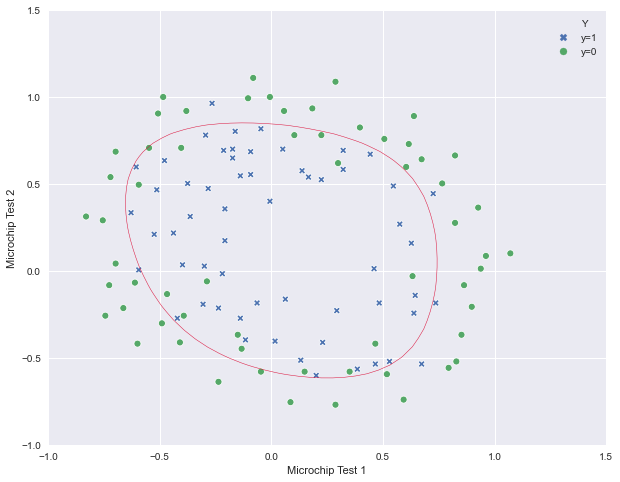

In [163]:
# 当lambda=1时
PlotLogisticDecisionBoundary(data1, 1)

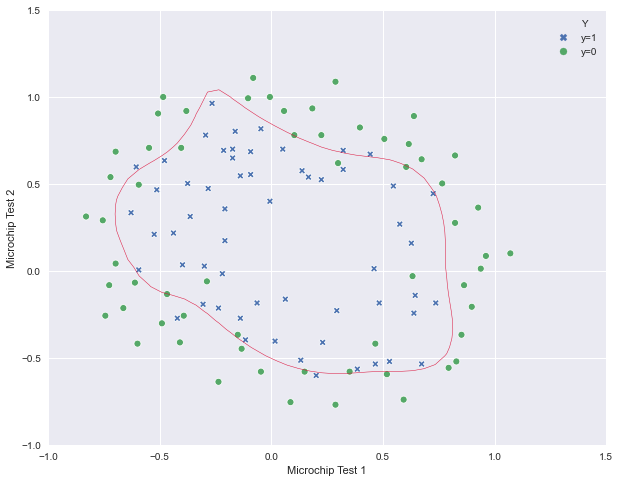

In [164]:
# 当lambda=0时
PlotLogisticDecisionBoundary(data1, 0)

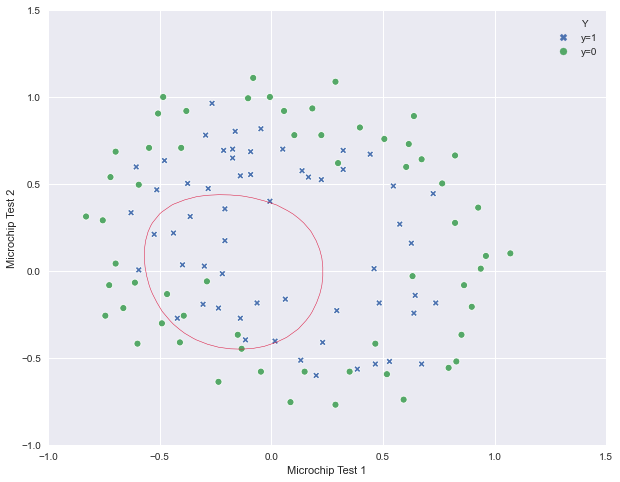

In [165]:
# 当lambda=100时
PlotLogisticDecisionBoundary(data1, 100)